d:\Programme\Anaconda\envs\facharbeit2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
d:\Programme\Anaconda\envs\facharbeit2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

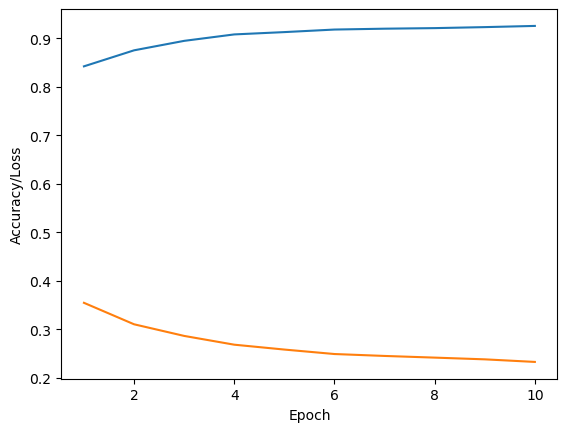

In [1]:
from model import *
from utils import *
from keras.callbacks import EarlyStopping

# Anweisungen an die Augmentierung von Keras
data_gen_args = dict(rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')

sample_size = 120
batch_size = 2
steps = sample_size // batch_size
steps *= 3
#steps = 500  # gefahr des overfittings
epochs = 10

size = (512, 512)

generator = trainGenerator(batch_size, 'data/cells/train', 'image',
                           'label', data_gen_args, target_size=size, target_dir=None)
model = unet(input_size=size + (1,))

model_path = f'experiment/{sample_size}.hdf5'
# Abspeichern des Modells nach jeder Epoche, falls der Loss-Wert kleiner ist
model_checkpoint = ModelCheckpoint(
    model_path, monitor='loss', verbose=1, save_best_only=True)
# Abbruch des Trainings, wenn der Loss-Wert nach 5 Epochen nicht kleiner wird
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)

# Callback für die Visualisierung des Loss- und accuracy-Wertes
logs = LogCallback()

model.fit_generator(generator, steps_per_epoch=steps, epochs=epochs, callbacks=[
                    model_checkpoint, early_stopping, logs])

logs.visualise(save_path=model_path.replace('.hdf5', '.png'))